In [1]:
import ultralytics
from ultralytics import YOLO
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import wandb
wandb.init(mode="disabled")
import shutil

In [16]:
#if os.path.exists('dataset'):
    #shutil.rmtree('dataset')
#shutil.copytree('D:\Datasets/axial_t1wce_2_class', 'dataset')

'dataset'

In [6]:
files = os.listdir('C:/sameer/FYP_face_onyx/dataset/images/train')
random_file = random.choice(files)
random_file = os.path.splitext(random_file)[0]
print(random_file)

IMG_6788


SAMEER
(2048, 1536, 3)


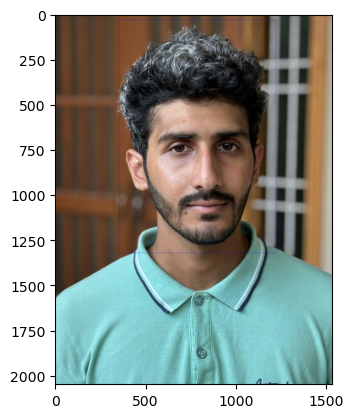

In [3]:
with open(os.path.join('C:/sameer/FYP_face_onyx/dataset/labels/train', f'{random_file}.txt'),'r') as f:
    labels = f.readlines()
    labels = labels[0].split(' ')
    f.close()

img = cv2.imread(os.path.join('C:/sameer/FYP_face_onyx/dataset/images/train', f'{random_file}.jpeg'), 1) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

faces_class, x, y, w, h = int(labels[0]), float(labels[1]), float(labels[2]), float(labels[3]), float(labels[4])
x_pt1 = int((x - w/2) * img.shape[1])
y_pt1 = int((y - h/2) * img.shape[0])
x_pt2 = int((x + w/2) * img.shape[1])
y_pt2 = int((y + h/2) * img.shape[0])

if faces_class ==0:
    print("HANNAN")
    colour = (255, 0, 0)
elif faces_class == 1:
    print("ARHAM")
    colour = (0, 255, 0)
else:
    print("SAMEER")
    colour = (0,0, 255)
cv2.rectangle(img, (x_pt1, y_pt1), (x_pt2, y_pt2), colour, 1)

print(img.shape)
plt.imshow(img)

In [4]:
train_images = os.listdir('C:/sameer/FYP_face_onyx/dataset/images/train')
test_images = os.listdir('C:/sameer/FYP_face_onyx/dataset/images/test')
train_labels = os.listdir('C:/sameer/FYP_face_onyx/dataset/labels/train')
test_labels = os.listdir('C:/sameer/FYP_face_onyx/dataset/labels/test')

num_train_images = len(train_images)
num_test_images = len(test_images)
num_train_labels = len(train_labels)
num_test_labels = len(test_labels)

print(num_train_images, num_test_images)
print(num_train_labels, num_test_labels)

636 114
636 114


In [5]:
os.path.splitext(random_file)[0]
unlabelled = set(train_images) - set([os.path.splitext(file)[0] + '.jpeg' for file in train_labels])
print(set(train_images))
print(set([os.path.splitext(file)[0] + '.jpeg' for file in train_labels]))
# for image in unlabelled:
#     os.remove(f'E:/FYP/dataset/images/train/{image}')

{'IMG_6979.JPEG', 'IMG_6102.JPEG', 'IMG_6206.JPEG', 'IMG_6711.JPEG', 'IMG_6438.JPEG', 'IMG_6777.JPEG', 'IMG_6430.JPEG', 'IMG_6819.JPEG', 'IMG_6247.JPEG', 'IMG_6726.JPEG', 'IMG_6117.JPEG', 'IMG_6812.JPEG', 'IMG_6599.JPEG', 'IMG_6971.JPEG', 'IMG_6176.JPEG', 'IMG_6559.JPEG', 'IMG_6224.JPEG', 'IMG_6766.JPEG', 'IMG_6571.JPEG', 'IMG_6579.JPEG', 'IMG_6436.JPEG', 'IMG_6741.JPEG', 'IMG_7049.JPEG', 'IMG_6980.JPEG', 'IMG_6822.JPEG', 'IMG_6222.JPEG', 'IMG_6249.JPEG', 'IMG_6713.JPEG', 'IMG_7003.JPEG', 'IMG_6970.JPEG', 'IMG_6488.JPEG', 'IMG_6106.JPEG', 'IMG_6445.JPEG', 'IMG_6460.JPEG', 'IMG_6742.JPEG', 'IMG_6815.JPEG', 'IMG_6335.JPEG', 'IMG_6271.JPEG', 'IMG_6495.JPEG', 'IMG_6703.JPEG', 'IMG_6731.JPEG', 'IMG_6406.JPEG', 'IMG_6818.JPEG', 'IMG_6548.JPEG', 'IMG_6405.JPEG', 'IMG_6988.JPEG', 'IMG_6617.JPEG', 'IMG_6219.JPEG', 'IMG_6482.JPEG', 'IMG_6120.JPEG', 'IMG_6593.JPEG', 'IMG_6734.JPEG', 'IMG_6795.JPEG', 'IMG_6292.JPEG', 'IMG_6331.JPEG', 'IMG_7013.JPEG', 'IMG_6258.JPEG', 'IMG_6276.JPEG', 'IMG_6749.JPE

In [6]:
train_images = os.listdir('C:/sameer/FYP_face_onyx/dataset/images/train')
test_images = os.listdir('C:/sameer/FYP_face_onyx/dataset/images/test')
train_labels = os.listdir('C:/sameer/FYP_face_onyx/dataset/labels/train')
test_labels = os.listdir('C:/sameer/FYP_face_onyx/dataset/labels/test')

num_train_images = len(train_images)
num_test_images = len(test_images)
num_train_labels = len(train_labels)
num_test_labels = len(test_labels)

print(num_train_images, num_test_images)
print(num_train_labels, num_test_labels)

636 114
636 114


In [7]:
val_split = int(num_train_images * 0.2)
val_images = random.sample(train_images, val_split)

if os.path.exists('C:/sameer/FYP_face_onyx/dataset/images/val'):
    shutil.rmtree('C:/sameer/FYP_face_onyx/dataset/images/val')
if os.path.exists('C:/sameer/FYP_face_onyx/dataset/labels/val'):
    shutil.rmtree('C:/sameer/FYP_face_onyx/dataset/labels/val')

os.mkdir('C:/sameer/FYP_face_onyx/dataset/images/val')
os.mkdir('C:/sameer/FYP_face_onyx/dataset/labels/val')

for image in val_images:
    shutil.move(f'C:/sameer/FYP_face_onyx/dataset/images/train/{image}', 'C:/sameer/FYP_face_onyx/dataset/images/val')

for image in val_images:
    label = os.path.splitext(image)[0] + '.txt'
    shutil.move(f'C:/sameer/FYP_face_onyx/dataset/labels/train/{label}', 'C:/sameer/FYP_face_onyx/dataset/labels/val')

In [8]:
pip install -r "C:/sameer/FYP_face_onyx/yolov5/requirements.txt"

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
text = """
path: C:/sameer/FYP_face_onyx/dataset
train: C:/sameer/FYP_face_onyx/dataset/images/train
val: C:/sameer/FYP_face_onyx/dataset/images/val

# Classes
nc: 3
names: ['Hannan','Arham','Sameer']
"""
with open("./fixed_path.yaml", 'w') as file:
    file.write(text)

In [10]:
import torch


In [10]:
model = YOLO('yolov5su.pt')

100%|██████████████████████████████████████████████████████████████████████████████| 17.7M/17.7M [00:45<00:00, 411kB/s]


In [12]:
results = model.train(data='fixed_path.yaml', epochs=30)

New https://pypi.org/project/ultralytics/8.2.54 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.53  Python-3.9.13 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i7-11700K 3.60GHz)
engine\trainer: task=detect, mode=train, model=yolov5su.pt, data=fixed_path.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

train: Scanning C:\sameer\FYP_face_onyx\dataset\labels\train.cache... 509 images, 0 backgrounds, 0 corrupt: 100%|██████
val: Scanning C:\sameer\FYP_face_onyx\dataset\labels\val.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████

Plotting labels to runs\detect\train2\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G     0.7713     0.4726      1.158         39        640: 100%|██████████| 32/32 [10:30<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G     0.7902      0.465      1.167         36        640: 100%|██████████| 32/32 [10:26<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127       0.86          1      0.953      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G     0.8276     0.4845      1.205         37        640: 100%|██████████| 32/32 [10:29<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.968          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G     0.7847     0.4926      1.167         33        640: 100%|██████████| 32/32 [10:28<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.995          1      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G     0.7732     0.4593      1.158         31        640: 100%|██████████| 32/32 [10:31<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.928      0.987       0.97      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      0.779     0.4546      1.167         32        640: 100%|██████████| 32/32 [10:30<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:00<0

                   all        127        127      0.998          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G     0.7877      0.426      1.169         35        640: 100%|██████████| 32/32 [10:31<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.842          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G     0.7765     0.4431      1.173         31        640: 100%|██████████| 32/32 [10:30<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.997          1      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G     0.7701     0.4331      1.165         34        640: 100%|██████████| 32/32 [10:26<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G     0.7725     0.4143      1.156         26        640: 100%|██████████| 32/32 [10:27<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.987          1      0.994       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G     0.7451     0.4269      1.141         33        640: 100%|██████████| 32/32 [10:26<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G     0.7273     0.4021      1.138         40        640: 100%|██████████| 32/32 [10:28<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G     0.7394     0.3992      1.144         33        640: 100%|██████████| 32/32 [10:28<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.7417     0.3936       1.14         32        640: 100%|██████████| 32/32 [10:29<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G     0.7412     0.3899      1.137         36        640: 100%|██████████| 32/32 [10:28<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.7058      0.369      1.125         35        640: 100%|██████████| 32/32 [10:29<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.6954     0.3568      1.115         30        640: 100%|██████████| 32/32 [10:28<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      0.716     0.3604      1.125         30        640: 100%|██████████| 32/32 [10:28<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.988          1      0.994      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G     0.6916     0.3394       1.11         30        640: 100%|██████████| 32/32 [10:27<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.988          1      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.6995     0.3501      1.116         36        640: 100%|██████████| 32/32 [10:29<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.854


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.6676     0.3176       1.18         13        640: 100%|██████████| 32/32 [10:28<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.6676     0.3137      1.204         13        640: 100%|██████████| 32/32 [10:27<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.6527     0.2988      1.173         13        640: 100%|██████████| 32/32 [10:29<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.6421     0.2848      1.179         13        640: 100%|██████████| 32/32 [10:26<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.6377     0.2765      1.173         13        640: 100%|██████████| 32/32 [10:28<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.6311     0.2804      1.155         13        640: 100%|██████████| 32/32 [10:30<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.6166     0.2646      1.152         13        640: 100%|██████████| 32/32 [10:25<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.6234     0.2614      1.145         13        640: 100%|██████████| 32/32 [10:28<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G     0.6214     0.2589      1.148         13        640: 100%|██████████| 32/32 [10:32<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.6175     0.2555      1.159         13        640: 100%|██████████| 32/32 [10:29<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.864



30 epochs completed in 5.718 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 18.5MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 18.5MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.2.53  Python-3.9.13 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i7-11700K 3.60GHz)
YOLOv5s summary (fused): 193 layers, 9112697 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:50<0


                   all        127        127      0.998          1      0.995      0.864
                Hannan         38         38      0.998          1      0.995      0.847
                 Arham         32         32      0.998          1      0.995      0.884
                Sameer         57         57      0.999          1      0.995      0.861
Speed: 2.4ms preprocess, 315.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\train2


In [21]:
print(results)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001FE10F93430>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

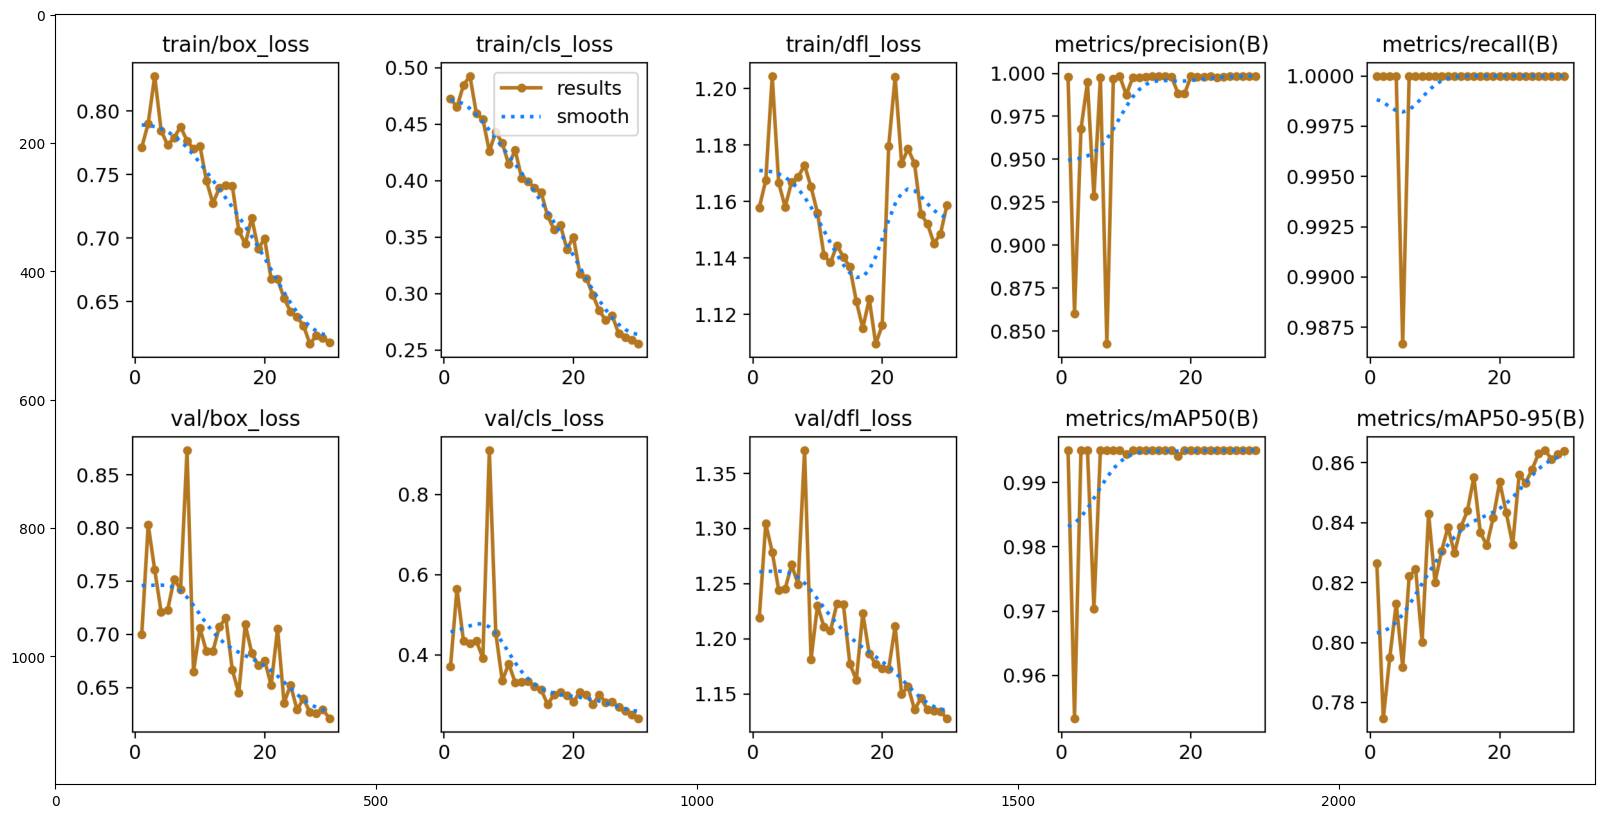

In [7]:
#training_save_dir = 'C:/kaggle/' + str(results.save_dir)
#print(training_save_dir)

plt.figure(figsize=(20, 10))
img = cv2.imread('C:/sameer/FYP_face_onyx/runs/detect/train/results.png')
plt.imshow(img)
plt.show()

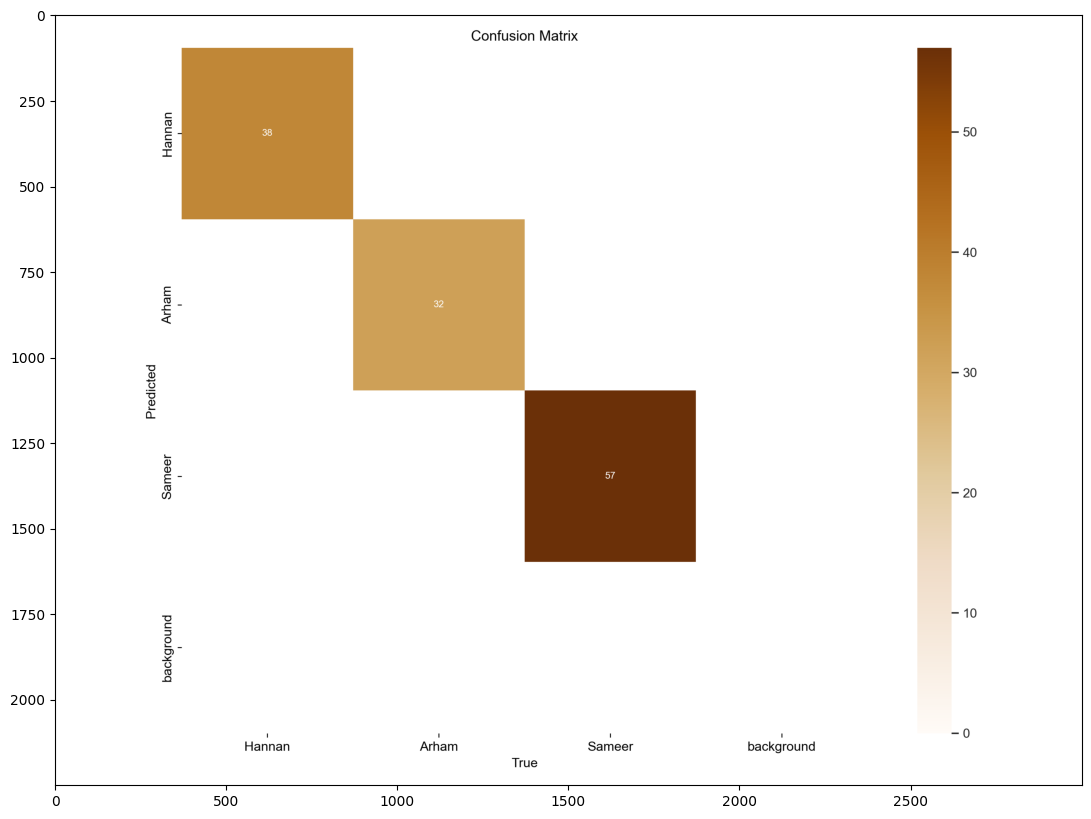

In [8]:
plt.figure(figsize=(20, 10))
img = cv2.imread('C:/sameer/FYP_face_onyx/runs/detect/train/confusion_matrix.png')
plt.imshow(img)
plt.show()

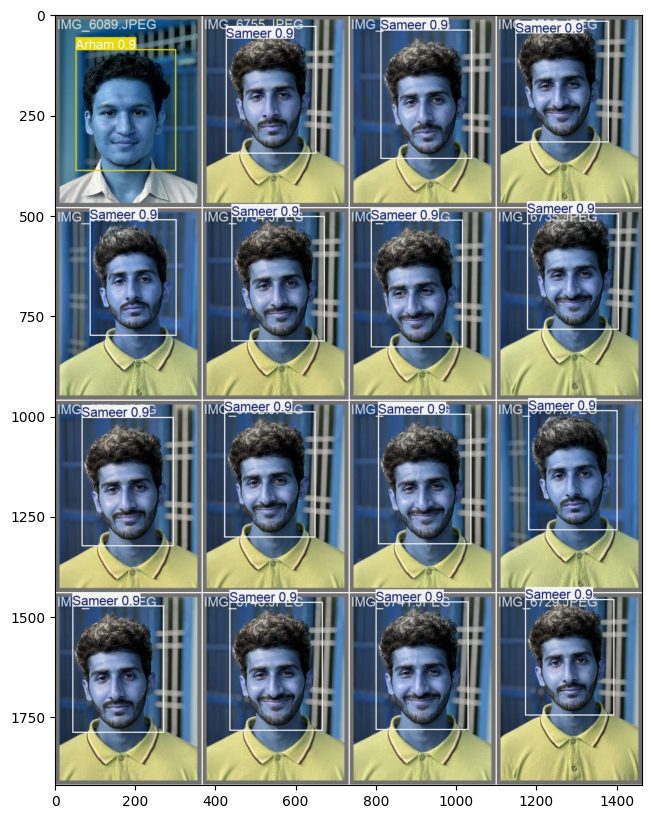

In [9]:
plt.figure(figsize=(20, 10))
img = cv2.imread('C:/sameer/FYP_face_onyx/runs/detect/train/val_batch0_pred.jpg')
plt.imshow(img)
plt.show()

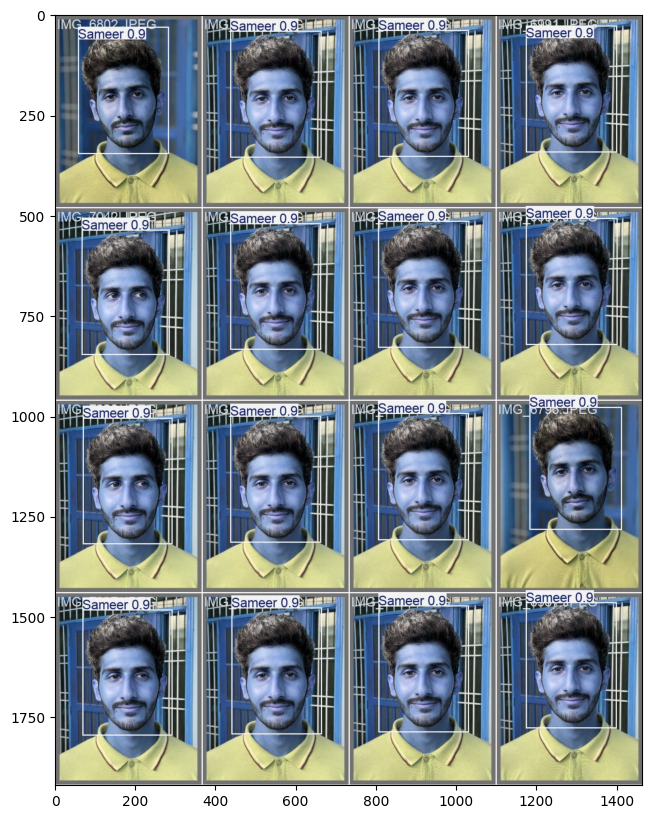

In [10]:
plt.figure(figsize=(20, 10))
img = cv2.imread('C:/sameer/FYP_face_onyx/runs/detect/train/val_batch1_pred.jpg')
plt.imshow(img)
plt.show()

In [5]:
trained_model = YOLO('C:/sameer/FYP_face_onyx/runs/detect/train/weights/best.pt')
predictions = trained_model.predict(
    source="C:/sameer/FYP_face_onyx/dataset/images/test",
    conf=0.4, save_txt=True, save_conf=True)


image 1/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6338.JPEG: 640x480 1 Arham, 582.9ms
image 2/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6339.JPEG: 640x480 1 Arham, 489.2ms
image 3/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6340.JPEG: 640x480 1 Arham, 562.0ms
image 4/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6341.JPEG: 640x480 1 Arham, 495.0ms
image 5/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6342.JPEG: 640x480 1 Arham, 450.1ms
image 6/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6343.JPEG: 640x480 1 Arham, 445.3ms
image 7/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6344.JPEG: 640x480 1 Arham, 483.9ms
image 8/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6345.JPEG: 640x480 1 Arham, 404.7ms
image 9/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6346.JPEG: 640x480 1 Arham, 385.2ms
image 10/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6347.JPEG: 640x480 1 Arham, 399.0ms
image 11/114 C:\sameer\FYP_face_onyx\d

image 86/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7060.JPEG: 640x480 1 Sameer, 468.3ms
image 87/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7061.JPEG: 640x480 1 Sameer, 447.7ms
image 88/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7062.JPEG: 640x480 1 Sameer, 560.8ms
image 89/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7063.JPEG: 640x480 1 Sameer, 421.8ms
image 90/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7064.JPEG: 640x480 1 Sameer, 703.0ms
image 91/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7065.JPEG: 640x480 1 Sameer, 484.5ms
image 92/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7066.JPEG: 640x480 1 Sameer, 817.9ms
image 93/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7067.JPEG: 640x480 1 Sameer, 486.8ms
image 94/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7068.JPEG: 640x480 1 Sameer, 437.9ms
image 95/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7069.JPEG: 640x480 1 Sameer, 611.0ms
image 96/114 C:\same

In [ ]:
trained_model = YOLO('C:/sameer/FYP_face_onyx/runs/detect/train/weights/best.pt')

In [9]:
predictions_save_dir = 'C:/sameer/FYP_face_onyx/' + predictions[0].save_dir + '/labels'

In [24]:
def draw_bbox(file_path, filename, img):
    with open(os.path.join(file_path, f'{filename}.txt'),'r') as f:
        labels = f.readlines()
        labels = labels[0].split(' ')
        print(labels)
        f.close()

    faces_class, x, y, w, h = int(labels[0]), float(labels[1]), float(labels[2]), float(labels[3]), float(labels[4])
    x_pt1 = int((x - w/2) * img.shape[1])
    y_pt1 = int((y - h/2) * img.shape[0])
    x_pt2 = int((x + w/2) * img.shape[1])
    y_pt2 = int((y + h/2) * img.shape[0])

    if faces_class == 0:
        colour = (255, 0, 0)
        label = 'Hannan'
    elif faces_class ==1:
        colour = (0, 255, 0)
        label = 'Arham'
    elif faces_class == 2:
        colour = (0, 0, 255)
        label = 'Sameer'

    if len(labels) > 5:
        prob = float(labels[5])
        prob = round(prob, 1)
        prob = str(prob)
        label = label + ' ' + prob

    cv2.rectangle(img, (x_pt1, y_pt1), (x_pt2, y_pt2), colour, 5)
    cv2.putText(img, label, (x_pt1, y_pt1 -100), cv2.FONT_HERSHEY_SIMPLEX, 5, colour, 15)

['2', '0.492355', '0.463701', '0.646777', '0.670714', '0.884422\n']
['2', '0.503500', '0.467028', '0.625984', '0.642717']


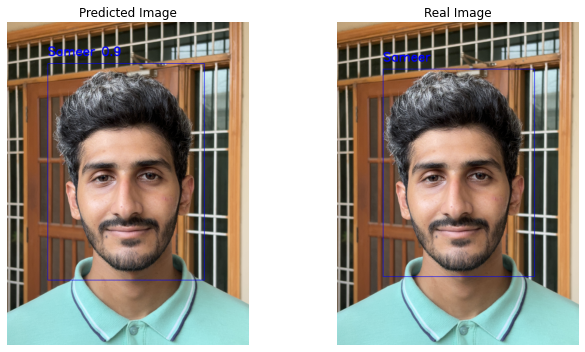

In [25]:
files = os.listdir('C:/sameer/FYP_face_onyx/runs/detect/predict/labels')
random_file = random.choice(files)
random_file = os.path.splitext(random_file)[0]

img_pred = cv2.imread(f'C:/sameer/FYP_face_onyx/dataset/images/test/{random_file}.jpeg', 1)
img_pred = cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)
draw_bbox(predictions_save_dir, random_file, img_pred)

img_real = cv2.imread(os.path.join('C:/sameer/FYP_face_onyx/dataset/images/test', f'{random_file}.jpeg'), 1)
img_real = cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB)
draw_bbox('dataset/labels/test', random_file, img_real)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_pred)
axes[0].set_title('Predicted Image')
axes[0].axis('off')

axes[1].imshow(img_real)
axes[1].set_title('Real Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [23]:
from ultralytics import YOLO
import cv2
import math
import requests
from datetime import date
from datetime import datetime
import json
# start webcam
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

# model
model = YOLO("C:/sameer/FYP_face_onyx/runs/detect/train/weights/best.pt")

# object classes
classNames = ["Hannan", "Arham", "Sameer"]


while True:
    success, img = cap.read()
    results = model(img, stream=True)

    # coordinates
    for r in results:
        boxes = r.boxes
        for box in boxes:
            # bounding box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

            # put box in cam
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

            # confidence
            confidence = math.ceil((box.conf[0]*100))/100
            # print("Confidence --->",confidence)

            # class name
            cls = int(box.cls[0])
            isUnknown = True if confidence < 0.5 else False
            # print("Class name -->", 'Unknown' if confidence < 0.5 else classNames[cls])

            # object details
            org = [x1, y1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            cv2.putText(img, 'Unknown' if confidence < 0.5 else classNames[cls], org, font, fontScale, color, thickness)
            
            keys = {
                'Sameer' : '7UKgVpNtT2UYeKeM2PMPB6LCPjF2',
                'Hannan' : 'wPnHYXndB6fQkNmX83uKA4E1iP02',
                'Arham' : 'vPXvYEjxf1Xb54HVHEHklVZUC9x2',
                'Unknown' : ''
            }

            url = 'https://faceonyx-app-59085-default-rtdb.firebaseio.com/alerts.json'
            current_date = date.today().strftime("%Y-%m-%d")
            current_time = datetime.now().strftime("%H:%M:%S")
            custom_json = {
                keys[classNames[cls]]:[
                    {
                        "date" : current_date,
                        "time" : current_time,
                        "authorized": True,
                        "user": classNames[cls]
                    }
                ]
            }
            custom_json = json.dumps(custom_json)
            print(custom_json)
            res = requests.patch(url, data = custom_json)
            print(res)
            
            #if not isUnknown:
                # Code to trigger ignition event on response

    cv2.imshow('Webcam', img)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 1 Arham, 766.2ms
{"vPXvYEjxf1Xb54HVHEHklVZUC9x2": [{"date": "2024-07-14", "time": "14:46:05", "authorized": true, "user": "Arham"}]}
<Response [200]>
Speed: 2.5ms preprocess, 766.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Sameer, 1036.5ms
{"7UKgVpNtT2UYeKeM2PMPB6LCPjF2": [{"date": "2024-07-14", "time": "14:46:07", "authorized": true, "user": "Sameer"}]}
<Response [200]>
Speed: 14.6ms preprocess, 1036.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Sameer, 783.4ms
{"7UKgVpNtT2UYeKeM2PMPB6LCPjF2": [{"date": "2024-07-14", "time": "14:46:08", "authorized": true, "user": "Sameer"}]}
<Response [200]>
Speed: 1.6ms preprocess, 783.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Sameer, 767.2ms
{"7UKgVpNtT2UYeKeM2PMPB6LCPjF2": [{"date": "2024-07-14", "time": "14:46:10", "authorized": true, "user": "Sameer"}]}
<Response [200]>
Speed: 6.3ms preprocess, 767.2ms inference, 0.0ms

<Response [200]>
{"wPnHYXndB6fQkNmX83uKA4E1iP02": [{"date": "2024-07-14", "time": "14:46:55", "authorized": true, "user": "Hannan"}]}
<Response [200]>
Speed: 5.9ms preprocess, 765.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Hannan, 1 Sameer, 673.2ms
{"7UKgVpNtT2UYeKeM2PMPB6LCPjF2": [{"date": "2024-07-14", "time": "14:46:56", "authorized": true, "user": "Sameer"}]}
<Response [200]>
{"wPnHYXndB6fQkNmX83uKA4E1iP02": [{"date": "2024-07-14", "time": "14:46:57", "authorized": true, "user": "Hannan"}]}
<Response [200]>
Speed: 0.0ms preprocess, 673.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Hannan, 640.9ms
{"wPnHYXndB6fQkNmX83uKA4E1iP02": [{"date": "2024-07-14", "time": "14:46:59", "authorized": true, "user": "Hannan"}]}
<Response [200]>
Speed: 3.4ms preprocess, 640.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Hannans, 716.9ms
{"wPnHYXndB6fQkNmX83uKA4E1iP02": [{"date": "2024-07-


0: 480x640 (no detections), 678.0ms
Speed: 5.3ms preprocess, 678.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Sameer, 607.4ms
{"7UKgVpNtT2UYeKeM2PMPB6LCPjF2": [{"date": "2024-07-14", "time": "14:47:42", "authorized": true, "user": "Sameer"}]}
<Response [200]>
Speed: 1.4ms preprocess, 607.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


In [7]:
from datetime import date
from datetime import datetime
keys = {
    'Sameer' : '7UKgVpNtT2UYeKeM2PMPB6LCPjF2',
    'Hannan' : 'wPnHYXndB6fQkNmX83uKA4E1iP02',
    'Arham' : 'vPXvYEjxf1Xb54HVHEHklVZUC9x2'
}



In [ ]:
date.today().strftime("%Y-%m-%d")

In [88]:
datetime.now().strftime("%H:%M:%S")

'20:34:04'

In [ ]:
import requests
from datetime import date
from datetime import datetime
import json
keys = {
    'Sameer' : '7UKgVpNtT2UYeKeM2PMPB6LCPjF2',
    'Hannan' : 'wPnHYXndB6fQkNmX83uKA4E1iP02',
    'Arham' : 'vPXvYEjxf1Xb54HVHEHklVZUC9x2'
}

url = 'https://faceonyx-app-59085-default-rtdb.firebaseio.com/alerts.json'
current_date = date.today().strftime("%Y-%m-%d")
current_time = datetime.now().strftime("%H:%M:%S")
custom_json = {
    keys['Sameer']:[
        {
            "date" : current_date,
            "time" : current_time,
            "authorized": True,
            "user": 'Sameer'
        }
    ]
}
custom_json = json.dumps(custom_json)
print(custom_json)
res = requests.patch(url, data = custom_json)
print(res)

In [ ]:
1+1